## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

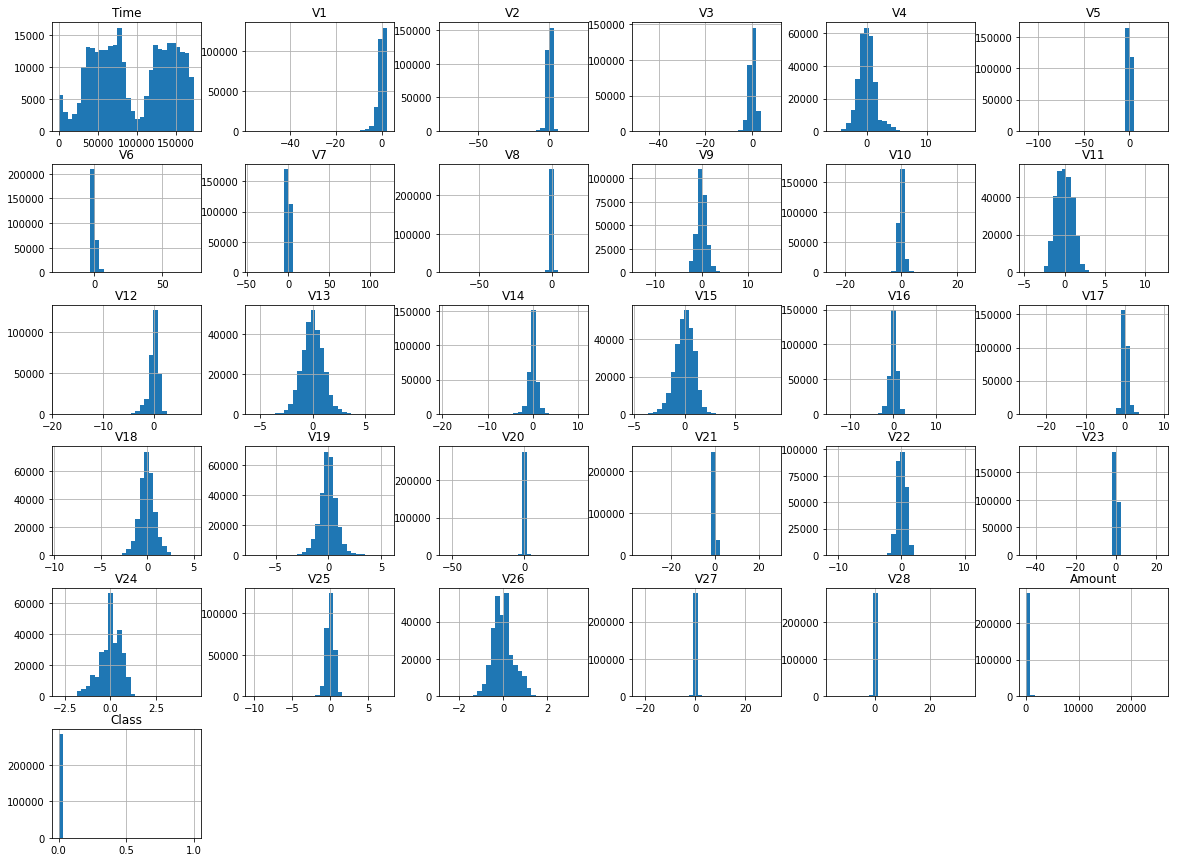

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
df.hist(figsize=(20,15),bins=30)


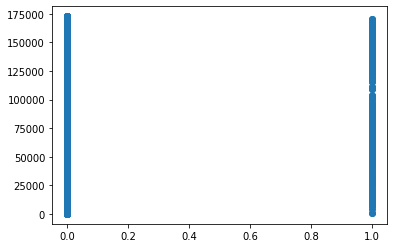

In [7]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(x = df.Class, y = df.Time)

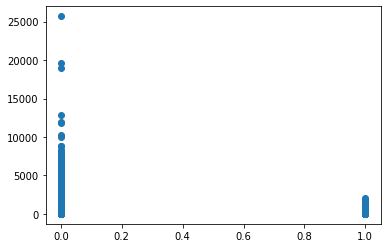

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(x = df.Class, y = df.Amount)

In [9]:
# Drop unnecessary columns. In this case we drop time column as it is simply behaves like a counter which will not be helpful to us
df = df.drop("Time", axis = 1)


### Splitting the data into train & test data

In [10]:
x = df.drop("Class", axis = 1)
y = df.Class

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 123)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
332
160


### Plotting the distribution of a variable

(array([1.00000e+00, 1.00000e+00, 3.00000e+00, 1.80000e+01, 3.00000e+01,
        8.10000e+01, 1.84000e+02, 8.89000e+02, 9.46200e+03, 2.74138e+05]),
 array([-56.40750963, -50.52126567, -44.63502171, -38.74877774,
        -32.86253378, -26.97628982, -21.09004586, -15.2038019 ,
         -9.31755793,  -3.43131397,   2.45492999]),
 <BarContainer object of 10 artists>)

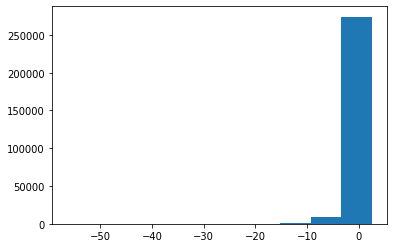

In [13]:
# plot the histogram of a variable from the dataset to see the skewness
plt.hist(df.V1)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [14]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = 'yeo-johnson', standardize = True, copy = False)
df_trans = power.fit_transform(df)

In [15]:
df_trans

array([[-0.9048152 , -0.13150276,  2.17607386, ..., -0.05333224,
         1.11901341, -0.04159898],
       [ 0.62638966,  0.09306734, -0.03506242, ...,  0.05749143,
        -1.12846424, -0.04159898],
       [-0.90424231, -0.87185802,  1.38129728, ..., -0.17375212,
         1.62328624, -0.04159898],
       ...,
       [ 1.30917055, -0.27480125, -1.85834088, ..., -0.07043663,
         0.67558998, -0.04159898],
       [-0.39584388,  0.27752167,  0.39117209, ...,  0.33358146,
        -0.42729814, -0.04159898],
       [-0.54534012, -0.20558579,  0.39187039, ...,  0.05416788,
         1.32320001, -0.04159898]])

(array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 2.70100e+03, 2.82106e+05,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 3.00000e+00, 3.42800e+03, 2.81358e+05,
         1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.89500e+03, 2.82912e+05,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 3.63800e+03, 2.81169e+05,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.00000e+00, 0.00000e+00, 5.00000e+00, 2.26400e+03, 2.82516e+05,
         2.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 1.00000e+00, 1.60000e+01, 1.68600e+03, 2.83103e+05,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [0.00000e+00, 0.00000e+00, 1.20000e+01, 2.84900e+03, 2.81907e+05,
         3.70000e+01, 1.00000e+0

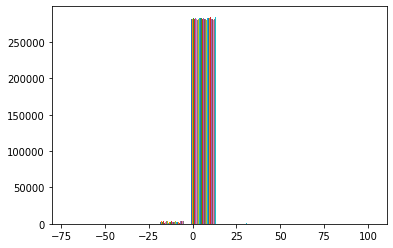

In [16]:
# plot the histogram of a variable from the dataset again to see the result 
plt.hist(df_trans)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# num_C = ______  #--> list of values
# cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [18]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [19]:
#perform cross validation
LR = LogisticRegression()

k_fold = StratifiedKFold(n_splits = 5,shuffle = True, random_state = 123)
# for train_index, test_index in k_fold.split(x,y):
#     X_train_cv, X_test_cv = x[train_index], x[test_index]
#     y_train_cv, y_test_cv = y[train_index], y[test_index]

#perform hyperparameter tuning
lr_params = {
    'solver':['newton-cg', 'lbfgs', 'liblinear'],
    'penalty':['l2'],
    'C':[100, 10, 1.0, 0.1, 0.01]
    }
grid_search = GridSearchCV(estimator = LR, param_grid = lr_params, n_jobs = -1, cv = k_fold, scoring = 'f1')
grid_result = grid_search.fit(x, y)

#print the evaluation result by choosing a evaluation metric
print("Best score {}".format(grid_result.best_score_))

#print the optimum value of hyperparameters
print("Best parameters {}".format(grid_result.best_params_))

Best score 0.726905369844956
Best parameters {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Python383\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Best LR params**

Best score 0.7299752979486616
Best parameters {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}



In [20]:
def fit_a_model(model_type, n_splits, shuffle, random_state, model_params, scoring, x, y):
    model = model_type
    k_fold = StratifiedKFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
    grid_search = GridSearchCV(estimator = model, param_grid = model_params, n_jobs = -1, cv = k_fold, scoring = scoring, verbose = 3)
    grid_result = grid_search.fit(x, y)
    best_score_and_params_dict = dict(best_score = grid_result.best_score_, best_params = grid_result.best_params_)
    return best_score_and_params_dict

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [21]:
#KNN
# from sklearn.neighbors import KNeighborsClassifier

# n_neighbors = list(range(1,11))

# knn_params = dict(n_neighbors = n_neighbors)

# best_knn_model_details = fit_a_model(KNeighborsClassifier(), n_splits = 5, shuffle = True, random_state = 123, model_params = knn_params, scoring = 'f1', x = x, y = y)

# best_knn_model_details

**Best KNN model details**

best_knn_model_details
{'best_score': 0.7875857545562892, 'best_params': {'n_neighbors': 3}}

In [22]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# dt_params = {
#     'max_depth':[5,10],
#     'min_samples_leaf':[500,1000,1500],
#     'criterion':['gini','entropy'],
#     'min_samples_split':[500,100,1500]}
# best_dt_model_details = fit_a_model(DecisionTreeClassifier(), 5, True, 123, dt_params, 'f1', x, y)
# best_dt_model_details

**Best DT model details**

{'best_params': {'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 500,
  'min_samples_split': 500},
 'best_score': 0.6180406887019869}

In [23]:
# #Random Forests
# from sklearn.ensemble import RandomForestClassifier

# rf_params = {
#     'max_depth': [10,12],
#     'min_samples_leaf': [50,60],
#     'n_estimators': [60,70],
#     'min_samples_split': [500,1000]
# }
# best_rf_model_details = fit_a_model(RandomForestClassifier(), 5, True, 123, rf_params, 'f1', x, y)
# best_rf_model_details

**Best RF model details**
{'best_score': 0.7108715634113665,
 'best_params': {'max_depth': 10,
  'min_samples_leaf': 50,
  'min_samples_split': 500,
  'n_estimators': 70}}

In [24]:
# #SVM
# from sklearn.svm import LinearSVC, SVC
# svm_params = {'C':[0.001,1],
#              'gamma':[1,0.1,0.01],
#              'degree':[2,3],
#              'coef0':[0,4]}
# best_svm_model_details = fit_a_model(SVC(kernel='poly'), 5, True, 123, svm_params, 'f1', x, y)
# best_svm_model_details

Commenting already trained models because training them again is not feasible everytime the notebook is opened fresh as it takes hours to train.

**SVM and XGBoost were taking very very long times to train** (kept training for 15 hrs and still hadnt completed training) so we are moving ahead with choosing the best among the above three models trained.


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.predict_proba(X_test)

C:\Python383\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
clf.feature_names_in_

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 9
2nd Top var = 8
3rd Top var = 7


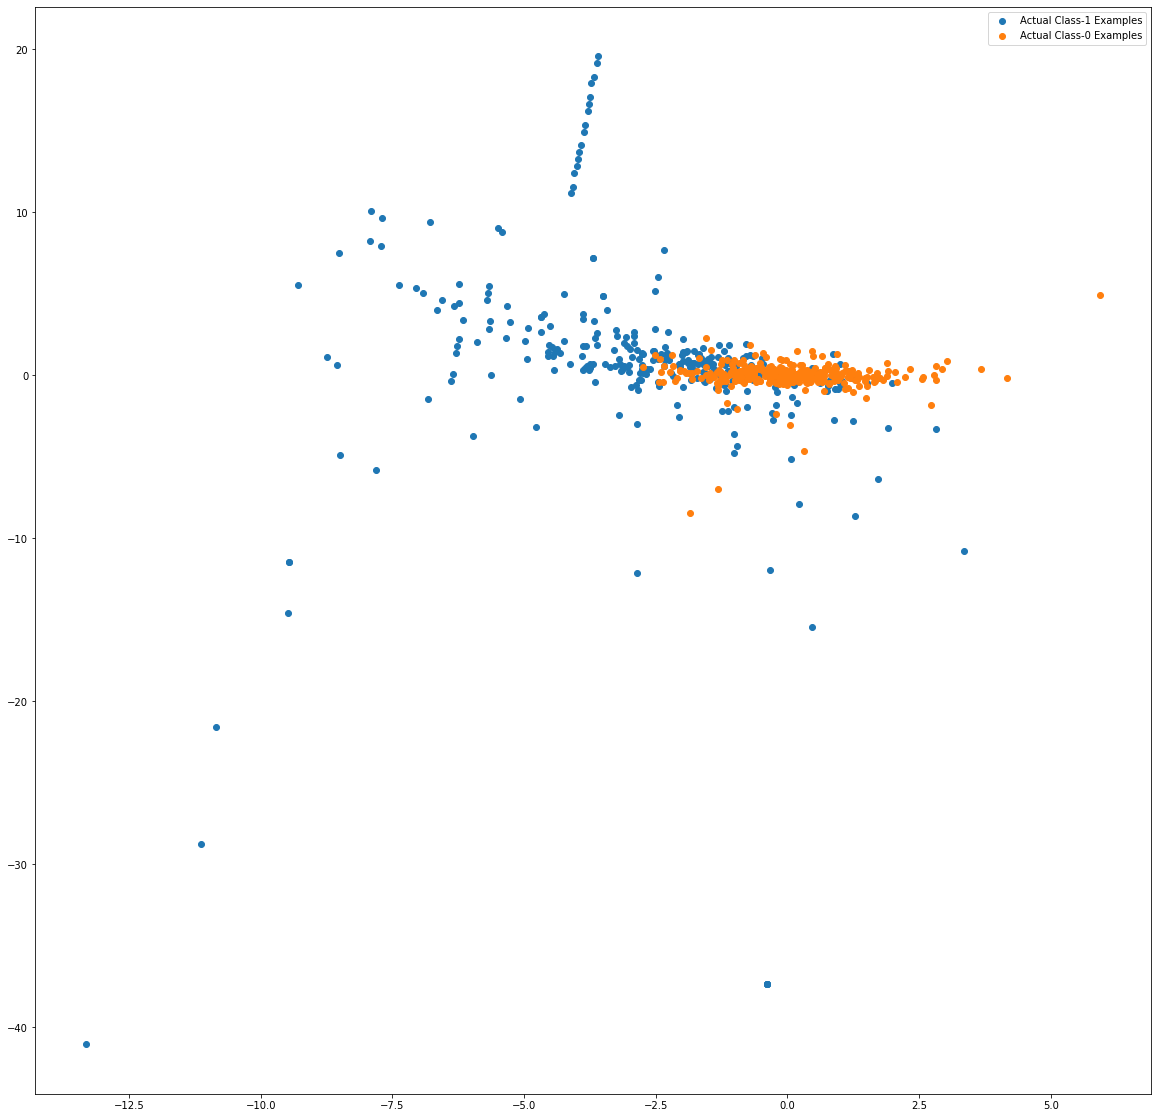

In [28]:


var_imp = []
for i in clf.feature_names_in_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_names_in_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_names_in_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_names_in_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_names_in_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_names_in_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [29]:
# # Logistic Regression
# from sklearn import linear_model #import the package

# num_C = ______  #--> list of values
# cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [31]:
from imblearn import over_sampling #- import the packages

oversample = over_sampling.RandomOverSampler(sampling_strategy = 'minority', random_state = 123)
x_oversampled, y_oversampled = oversample.fit_resample(x,y)

# #Logistic Regression
# lr_params = {
#     'solver':['newton-cg', 'lbfgs', 'liblinear'],
#     'penalty':['l2'],
#     'C':[100, 10, 1.0, 0.1, 0.01]
#     }

# best_random_oversampled_lr_model_details = fit_a_model(LogisticRegression(),5, True, 123, lr_params, 'f1', x_oversampled, y_oversampled)
# best_random_oversampled_lr_model_details


**best_random_oversampled_lr_model_details**

{'best_score': 0.9479430266095378,
 'best_params': {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}}


In [32]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# dt_params = {
#     'max_depth':[5,10],
#     'min_samples_leaf':[500,1000,1500],
#     'criterion':['gini','entropy'],
#     'min_samples_split':[500,100,1500]}
# best_random_oversampled_dt_model_details = fit_a_model(DecisionTreeClassifier(), 5, True, 123, dt_params, 'f1', x_oversampled, y_oversampled)
# best_random_oversampled_dt_model_details

**best_random_oversampled_dt_model_details**

{'best_score': 0.9877250748784554,
 'best_params': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 500,
  'min_samples_split': 100}}

In [33]:
# #Random Forest
# from sklearn.ensemble import RandomForestClassifier

# rf_params = {
#     'max_depth': [10,12],
#     'min_samples_leaf': [50,60],
#     'n_estimators': [60,70],
#     'min_samples_split': [500,1000]
# }
# best_random_oversampled_rf_model_details = fit_a_model(RandomForestClassifier(), 5, True, 123, rf_params, 'f1', x_oversampled, y_oversampled)
# best_random_oversampled_rf_model_details

**best_random_oversampled_rf_model_details**

{'best_score': 0.998382206709195,
 'best_params': {'max_depth': 12,
  'min_samples_leaf': 60,
  'min_samples_split': 500,
  'n_estimators': 70}}

In [34]:
# #KNN

# from sklearn.neighbors import KNeighborsClassifier

# n_neighbors = list(range(1,11))

# knn_params = dict(n_neighbors = n_neighbors)

# best_knn_model_details = fit_a_model(KNeighborsClassifier(), 5, True, 123, knn_params, 'f1', x_oversampled, y_oversampled)

# best_knn_model_details

**best_random_oversampled_knn_model_details**

{'best_score': 0.9998663637021503, 'best_params': {'n_neighbors': 1}}

### Print the class distribution after applying SMOTE 

In [35]:
# import warnings
# warnings.filterwarnings("ignore")


# sm = over_sampling.SMOTE(random_state=0)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# # Artificial minority samples and corresponding minority labels from SMOTE are appended
# # below X_train and y_train respectively
# # So to exclusively get the artificial minority samples from SMOTE, we do
# X_train_smote_1 = X_train_smote[X_train.shape[0]:]

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


# plt.rcParams['figure.figsize'] = [20, 20]
# fig = plt.figure()

# plt.subplot(3, 1, 1)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
#             label='Artificial SMOTE Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
# plt.legend()

In [36]:
smote = over_sampling.SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(x,y)

# #Logistic Regression
# lr_params = {
#     'solver':['newton-cg', 'lbfgs', 'liblinear'],
#     'penalty':['l2'],
#     'C':[100, 10, 1.0, 0.1, 0.01]
#     }

# best_smote_lr_model_details = fit_a_model(LogisticRegression(),5, True, 123, lr_params, 'f1', x_smote, y_smote)
# best_smote_lr_model_details


**best_smote_lr_model_details**

{'best_score': 0.9586009570527174,
 'best_params': {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}}


In [44]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# dt_params = {
#     'max_depth':[5,10],
#     'min_samples_leaf':[500,1000,1500],
#     'criterion':['gini','entropy'],
#     'min_samples_split':[500,100,1500]}
# best_smote_dt_model_details = fit_a_model(DecisionTreeClassifier(), 5, True, 123, dt_params, 'f1', x_smote, y_smote)
# best_smote_dt_model_details

**best_smote_dt_model_details**

{'best_score': 0.9877613356595513,
 'best_params': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 500,
  'min_samples_split': 500}}

In [38]:
# #Random Forest
# from sklearn.ensemble import RandomForestClassifier

# rf_params = {
#     'max_depth': [10,12],
#     'min_samples_leaf': [50,60],
#     'n_estimators': [60,70],
#     'min_samples_split': [500,1000]
# }
# best_smote_rf_model_details = fit_a_model(RandomForestClassifier(), 5, True, 123, rf_params, 'f1', x_smote, y_smote)
# best_smote_rf_model_details

**best_smote_rf_model_details**

{'best_score': 0.9887374607763466,
 'best_params': {'max_depth': 12,
  'min_samples_leaf': 50,
  'min_samples_split': 500,
  'n_estimators': 70}}

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [39]:
# import warnings
# warnings.filterwarnings("ignore")

# from imblearn import over_sampling

# ada = over_sampling.ADASYN(random_state=0)
# X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# # Artificial minority samples and corresponding minority labels from ADASYN are appended
# # below X_train and y_train respectively
# # So to exclusively get the artificial minority samples from ADASYN, we do
# X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 20]
# fig = plt.figure()

# plt.subplot(3, 1, 1)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
#             label='Artificial ADASYN Class-1 Examples')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
# plt.legend()

In [40]:
ada = over_sampling.ADASYN(random_state=0)
x_ada, y_ada = ada.fit_resample(x,y)




In [41]:
# #Logistic Regression
# lr_params = {
#     'solver':['newton-cg', 'lbfgs', 'liblinear'],
#     'penalty':['l2'],
#     'C':[100, 10, 1.0, 0.1, 0.01]
#     }

# best_ada_lr_model_details = fit_a_model(LogisticRegression(),5, True, 123, lr_params, 'f1', x_ada, y_ada)
# best_ada_lr_model_details

**best_ada_lr_model_details**

{'best_score': 0.9159159482406576,
 'best_params': {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}}

In [42]:
# #Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# dt_params = {
#     'max_depth':[5,10],
#     'min_samples_leaf':[500,1000,1500],
#     'criterion':['gini','entropy'],
#     'min_samples_split':[500,100,1500]}
# best_ada_dt_model_details = fit_a_model(DecisionTreeClassifier(), 5, True, 123, dt_params, 'f1', x_ada, y_ada)
# best_ada_dt_model_details

**best_ada_dt_model_details**

{'best_score': 0.9708917222556762,
 'best_params': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 500,
  'min_samples_split': 500}}

In [43]:
# #Random Forest
# from sklearn.ensemble import RandomForestClassifier

# rf_params = {
#     'max_depth': [10,12],
#     'min_samples_leaf': [50,60],
#     'n_estimators': [60,70],
#     'min_samples_split': [500,1000]
# }
# best_ada_rf_model_details = fit_a_model(RandomForestClassifier(), 5, True, 123, rf_params, 'f1', x_ada, y_ada)
# best_ada_rf_model_details

**best_ada_rf_model_details**

{'best_score': 0.9956430474081838,
 'best_params': {'max_depth': 12,
  'min_samples_leaf': 50,
  'min_samples_split': 500,
  'n_estimators': 70}}

**Observations**

- Out of the three oversampling methods, **SMOTE** seems to overall give better performing models for most of the models trained (LR, DT, RF etc)
- So we will go with SMOTE oversamplng for the final model
- Using SMOTE, we saw that the LR model scored 95.8600 whereas the DT model scored 98.7761 and RF scored 98.8737
- As per these observations, **DT** and **RF** scored very similar with some basic hyperparameter tuning but where DT took **20-40 minutes** to train, RF took **90-150 minutes** to train
- KNN model training was only succesfull using Random oversampling and that alone took 10.5 hrs and gave the best param to be n_neighbor = 1
- SVM and XGB training was never succesful even after keeping the training run for 15 hrs and with the given hardware I have, it is not feasible to go for SVM or XGB (google collab free gave same results and all nimble box credits were exhausted trying to train them but no use)
- So, taking all these points in consideration, I'm choosing **SMOTE** as the oversampling method and **Decision Tree** as the model to go with as it is giving similar score to Random Forest with lesser training time.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [47]:
from sklearn.tree import DecisionTreeClassifier


In [48]:
# perform the best oversampling method on X_train & y_train

x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, train_size = 0.7, test_size = 0.3, random_state = 123)
  
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 500, min_samples_split = 500)  #initialise the model with optimum hyperparameters
clf.fit(x_smote_train, y_smote_train) # fit on the balanced dataset


DecisionTreeClassifier(max_depth=10, min_samples_leaf=500,
                       min_samples_split=500)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_smote_test, clf.predict(x_smote_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85138
           1       0.98      0.97      0.97     85451

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


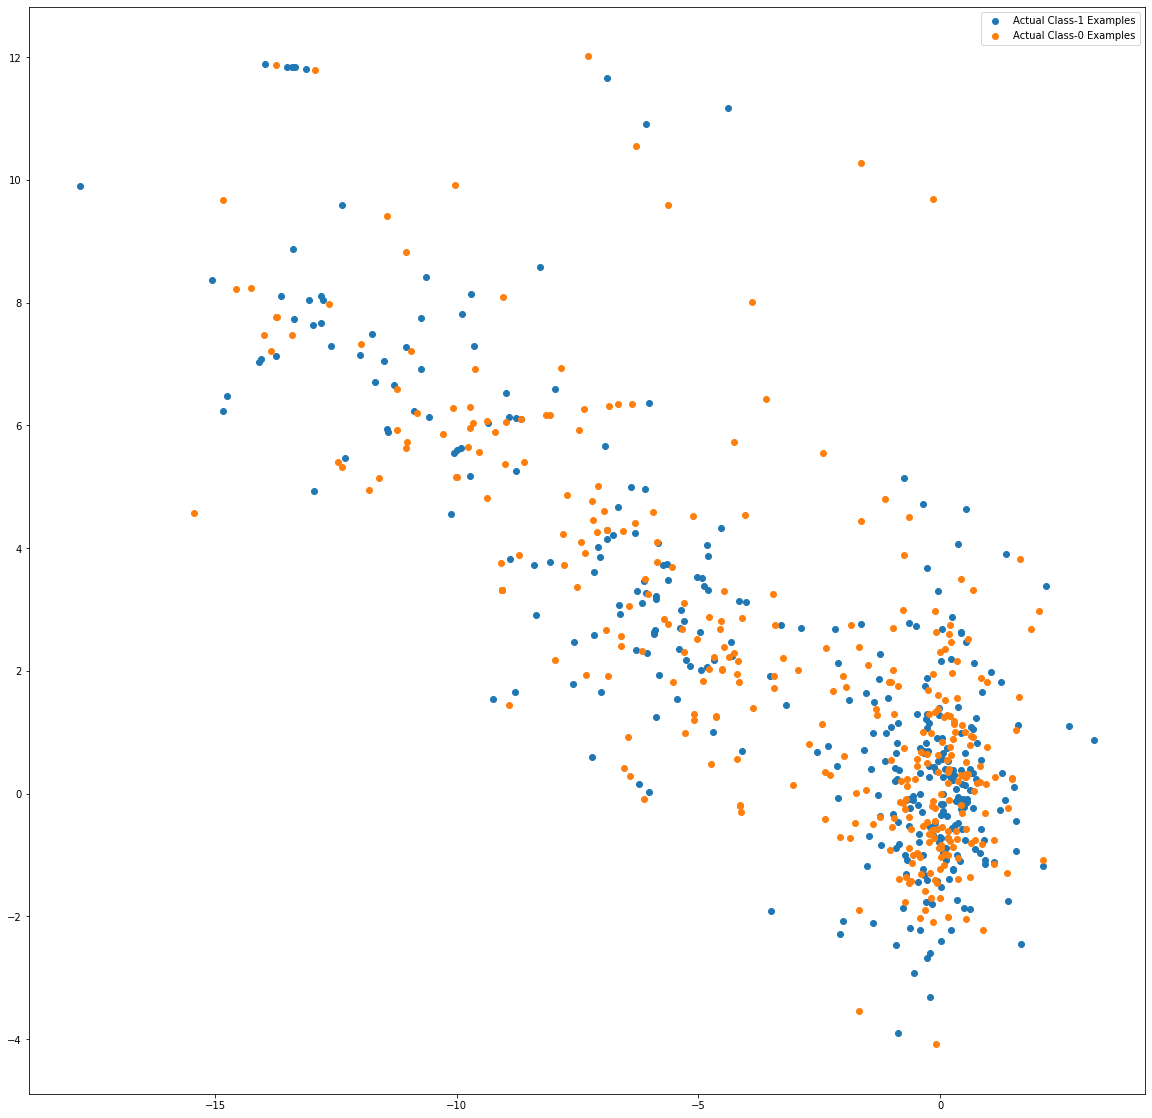

In [53]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = x_smote_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = x_smote_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

C:\Python383\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


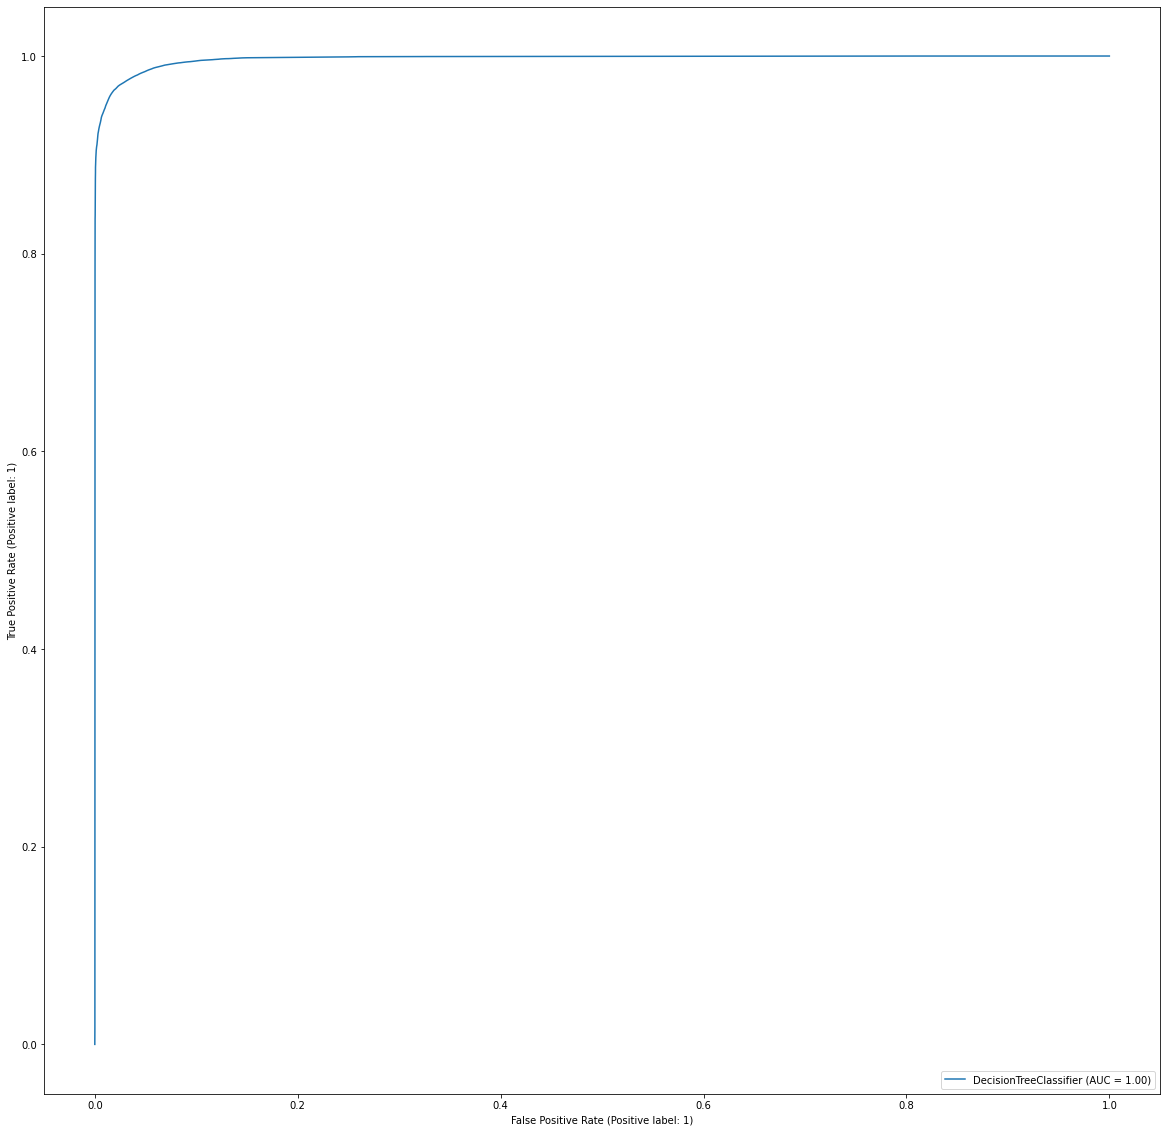

In [62]:
#### Print the FPR,TPR & select the best threshold from the roc curve
from sklearn import metrics

y_test_pred = clf.predict(x_smote_test)

metrics.plot_roc_curve(clf, x_smote_test, y_smote_test)

In [61]:
print('Train auc =', metrics.roc_auc_score(y_smote_test, y_test_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_smote_test, y_test_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9732717055470418
1
